In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import mstats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.metrics import recall_score,accuracy_score, mean_squared_error, r2_score, log_loss, precision_score

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score, precision_score,roc_auc_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
# from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 0.파일 불러오기

In [3]:
df = pd.read_csv('../data/processed_data/재무비율_final.csv')
df

,회사명,거래소코드,회계년도,소속코드,통계청 한국표준산업분류 코드 10차(대분류),산업코드,산업명,상장일,상장폐지일,총자본증가율(IFRS),...,기계장비율(IFRS),자본집약도(IFRS),총자본투자효율(IFRS),설비투자효율(IFRS),기계투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),이윤분배율(IFRS),label
0,(주)다이나믹디자인,145210,2015,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-4.56,...,207.99,1884.51,19.72,47.24,98.91,29.06,70.82,29.18,2.06,1
1,(주)다이나믹디자인,145210,2016,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-12.91,...,0.00,1807.53,-3.89,-8.14,0.00,-5.57,0.00,0.00,0.00,1
2,(주)다이나믹디자인,145210,2017,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-17.07,...,51.56,335.64,8.59,17.23,44.66,12.60,190.09,-90.09,-161.93,1
3,(주)대우건설,47040,2012,1,41,64101,종합 건설업,2001-03-23,NaN,4.13,...,7.74,1802.31,13.73,320.28,2422.60,16.47,59.28,40.72,12.78,0
4,(주)대우건설,47040,2013,1,41,64101,종합 건설업,2001-03-23,NaN,2.67,...,6.58,1523.25,4.00,94.39,731.03,4.62,225.45,-125.45,-177.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,한솔아이원스(주),114810,2014,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,-0.08,...,124.05,333.32,24.18,38.24,64.97,36.25,45.96,54.04,22.74,1
385,한솔아이원스(주),114810,2015,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,26.94,...,50.84,362.50,17.79,50.15,126.87,33.75,59.94,40.06,5.72,1
386,한솔아이원스(주),114810,2016,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,19.93,...,66.13,401.55,7.78,12.58,47.27,14.45,150.52,-50.52,-131.65,1
387,한솔아이원스(주),114810,2017,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,18.82,...,50.51,361.28,17.01,31.36,121.67,24.62,59.64,40.36,-1.99,1


In [4]:
X_data = df[df.columns[9:-1]]
y_data = df['label']

## 1.데이터 split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 40)

In [6]:
n, d = X_train.shape
print("number of feature:", d)  
print("number of data:", n)

number of feature: 133
number of data: 272


## 윈저라이징

In [7]:
before_winsor_feature = X_train.copy()

In [8]:
X_train.columns

Index(['총자본증가율(IFRS)', '유형자산증가율(IFRS)', '투자부동산증가율(IFRS)', '비유동자산증가율(IFRS)',
       '유동자산증가율(IFRS)', '재고자산증가율(IFRS)', '자기자본증가율(IFRS)', '매출액증가율(IFRS)',
       '정상영업이익증가율(IFRS)', '순이익증가율(IFRS)',
       ...
       '노동장비율(IFRS)', '기계장비율(IFRS)', '자본집약도(IFRS)', '총자본투자효율(IFRS)',
       '설비투자효율(IFRS)', '기계투자효율(IFRS)', '부가가치율(IFRS)', '노동소득분배율(IFRS)',
       '자본분배율(IFRS)', '이윤분배율(IFRS)'],
      dtype='object', length=133)

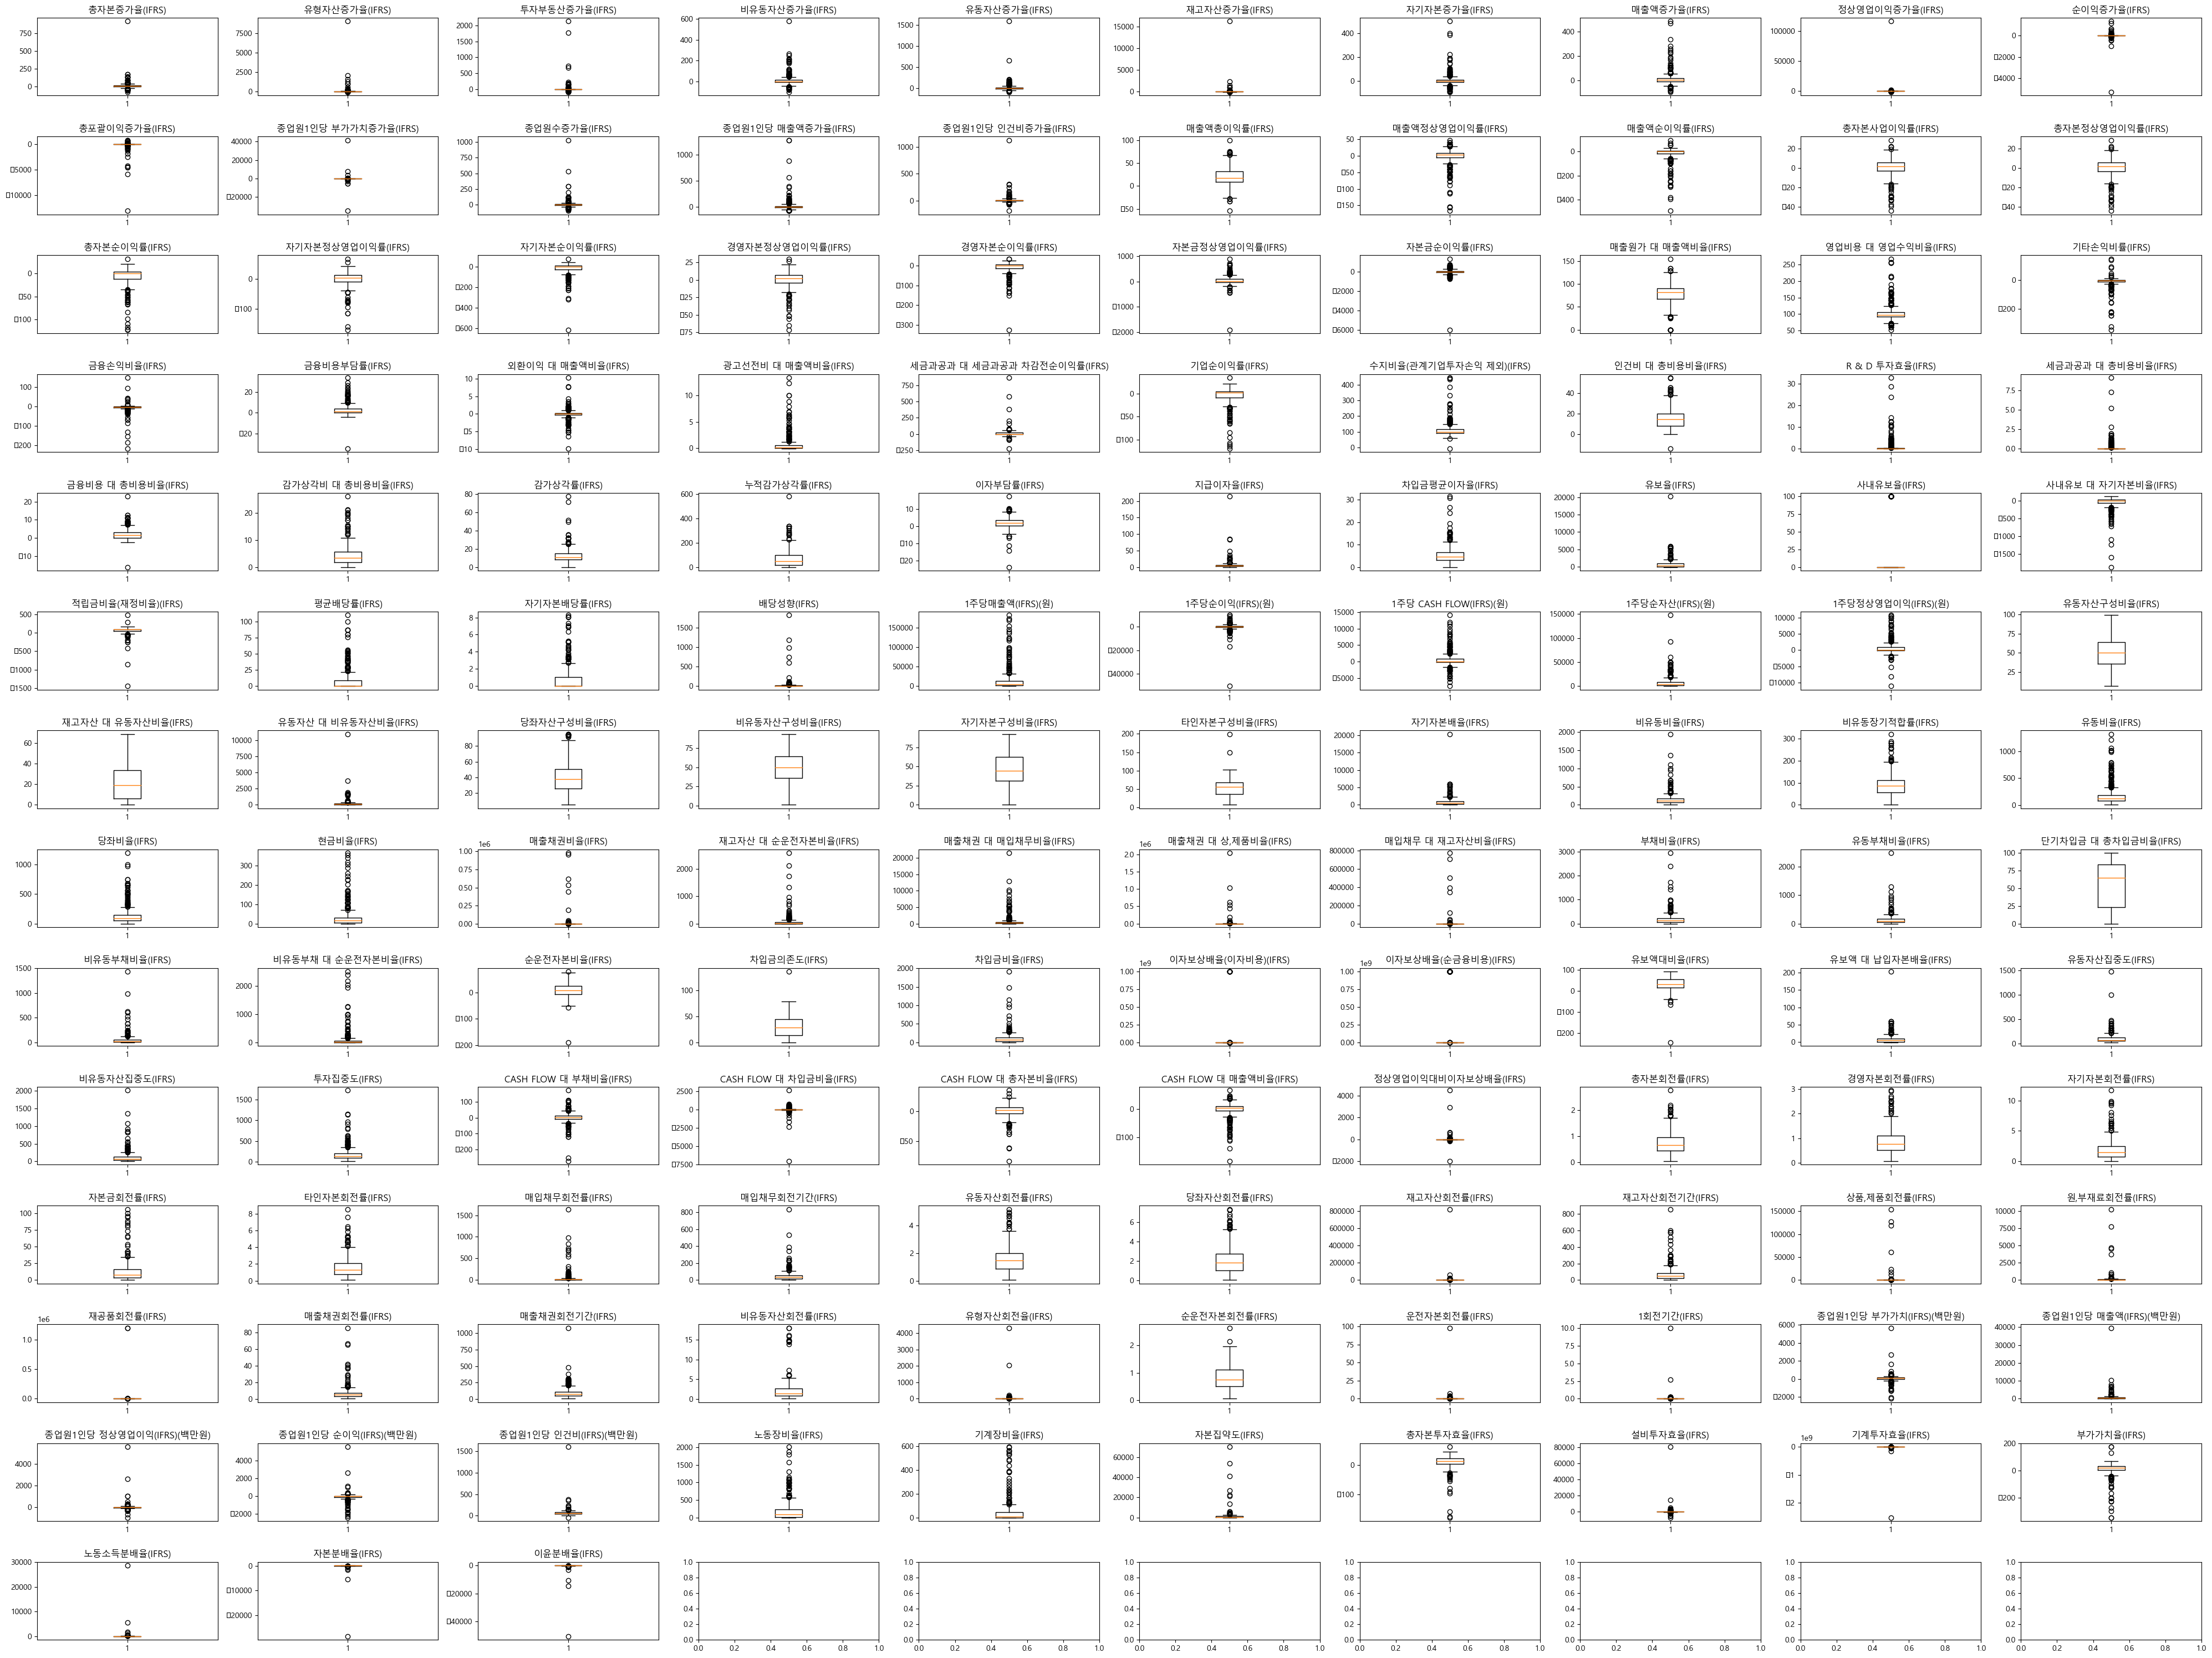

In [9]:
# from matplotlib import font_manager, rc
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'Malgun Gothic'

selected_variables = X_train
# 5x4 subplot 생성
fig, axes = plt.subplots(14, 10, figsize=(40, 30))
axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

for i, var in enumerate(selected_variables):
    # i번째 axes에 i번째 변수의 히스토그램을 그림
    axes[i].boxplot(df[var])
    axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

plt.tight_layout()  # subplot 간격 조정
plt.show()

In [10]:
X_train.describe()

,총자본증가율(IFRS),유형자산증가율(IFRS),투자부동산증가율(IFRS),비유동자산증가율(IFRS),유동자산증가율(IFRS),재고자산증가율(IFRS),자기자본증가율(IFRS),매출액증가율(IFRS),정상영업이익증가율(IFRS),순이익증가율(IFRS),...,노동장비율(IFRS),기계장비율(IFRS),자본집약도(IFRS),총자본투자효율(IFRS),설비투자효율(IFRS),기계투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),이윤분배율(IFRS)
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,272.000000,272.000000,272.000000,272.000000
mean,7.508456,52.835515,17.490588,10.913750,15.609926,81.057941,8.059522,12.437831,430.498676,14.070515,...,194.651544,47.173015,1636.761985,9.128640,441.870515,-9.114542e+05,10.969449,91.449559,-12.037794,-125.544743
std,61.255798,571.296181,174.448279,54.920373,110.881765,999.705143,55.014735,58.871407,7038.517141,144.405401,...,283.927816,105.117967,5897.424382,26.117989,5041.158602,9.972621e+06,47.823055,353.565166,350.527948,1104.211451
min,-81.910000,-99.520000,-92.310000,-99.470000,-94.560000,-98.690000,-90.610000,-98.090000,-1221.740000,-955.060000,...,0.000000,0.000000,0.000000,-179.020000,-7119.060000,-1.488342e+08,-346.290000,0.000000,-5510.330000,-14751.720000
25%,-4.590000,-6.817500,0.000000,-6.320000,-8.587500,-13.802500,-7.900000,-8.212500,-0.242500,0.000000,...,10.187500,0.000000,340.077500,3.607500,9.177500,0.000000e+00,5.312500,25.782500,0.000000,-11.812500
50%,2.590000,0.000000,0.000000,2.235000,1.570000,0.000000,1.145000,1.735000,0.000000,0.000000,...,94.060000,8.565000,637.580000,12.250000,49.670000,1.723550e+02,18.905000,54.405000,26.605000,0.000000
75%,10.205000,9.815000,0.000000,15.817500,14.962500,14.515000,11.035000,16.222500,0.392500,0.000000,...,248.460000,43.750000,1327.785000,22.667500,123.720000,7.008150e+02,33.317500,77.077500,49.717500,20.812500
max,922.640000,9039.490000,2133.950000,574.830000,1591.630000,16282.800000,499.400000,469.560000,116066.340000,1352.070000,...,2018.180000,593.280000,70461.400000,62.640000,80789.490000,7.327887e+04,130.990000,5610.330000,92.530000,77.600000


## 2. 이상치 처리
컬럼마다 이상치의 분포가 상하위, 상위, 하위에 분포하는 비율이 다르기 때문에 각자 다르게 이상치 조정 필요
- 상하위 고르게 분포한 컬럼
- 상위에 분포한 컬럼
- 하위에 분포한 컬럼

In [11]:
# import numpy as np
# from scipy.stats import mstats
# import statsmodels.api as sm

# 중앙값과 절대 중앙값 편차 (MAD) 계산 함수
def mad_based_outliers(df, threshold=3):        # 임계값은 3으로 설정
    median = np.median(df)
    mad = sm.robust.scale.mad(df)
    mad_scaled = np.abs(df - median) / mad if mad != 0 else 0
    return mad_scaled > threshold

# 윈저라이징 조건 설정 함수
def apply_winsorization_based_on_outliers(df, threshold=3):
    winsorization_info = {}  # 각 컬럼별 윈저라이징 방식을 저장할 딕셔너리

    for column in df.columns:
        # MAD 기반 이상치 탐지
        outliers_mask = mad_based_outliers(df[column], threshold)
        outliers_high = np.sum(outliers_mask & (df[column] > np.median(df[column])))
        outliers_low = np.sum(outliers_mask & (df[column] < np.median(df[column])))

        # 조건에 따라 윈저라이징 방식 결정
        if outliers_high > 0 and outliers_low == 0:  # 상위 이상치만 있을 때
            df[column] = mstats.winsorize(df[column], limits=(0, 0.02))  # 상위 2%만 윈저라이징
            winsorization_info[column] = "상위 2% 윈저라이징"
        elif outliers_low > 0 and outliers_high == 0:  # 하위 이상치만 있을 때
            df[column] = mstats.winsorize(df[column], limits=(0.02, 0))  # 하위 2%만 윈저라이징
            winsorization_info[column] = "하위 2% 윈저라이징"
        elif outliers_high > 0 and outliers_low > 0:  # 상하위 이상치가 모두 있을 때
            df[column] = mstats.winsorize(df[column], limits=(0.01, 0.01))  # 상하위 1%씩 윈저라이징
            winsorization_info[column] = "상하위 1% 윈저라이징"
    return winsorization_info

In [12]:
winsorization_info = apply_winsorization_based_on_outliers(X_train)

In [13]:
winsorization_info

{'총자본증가율(IFRS)': '상하위 1% 윈저라이징',
 '유형자산증가율(IFRS)': '상하위 1% 윈저라이징',
 '비유동자산증가율(IFRS)': '상하위 1% 윈저라이징',
 '유동자산증가율(IFRS)': '상하위 1% 윈저라이징',
 '재고자산증가율(IFRS)': '상하위 1% 윈저라이징',
 '자기자본증가율(IFRS)': '상하위 1% 윈저라이징',
 '매출액증가율(IFRS)': '상하위 1% 윈저라이징',
 '정상영업이익증가율(IFRS)': '상하위 1% 윈저라이징',
 '종업원1인당 부가가치증가율(IFRS)': '상하위 1% 윈저라이징',
 '종업원수증가율(IFRS)': '상하위 1% 윈저라이징',
 '종업원1인당 매출액증가율(IFRS)': '상하위 1% 윈저라이징',
 '종업원1인당 인건비증가율(IFRS)': '상하위 1% 윈저라이징',
 '매출액총이익률(IFRS)': '상하위 1% 윈저라이징',
 '매출액정상영업이익률(IFRS)': '상하위 1% 윈저라이징',
 '매출액순이익률(IFRS)': '상하위 1% 윈저라이징',
 '총자본사업이익률(IFRS)': '상하위 1% 윈저라이징',
 '총자본정상영업이익률(IFRS)': '상하위 1% 윈저라이징',
 '총자본순이익률(IFRS)': '상하위 1% 윈저라이징',
 '자기자본정상영업이익률(IFRS)': '상하위 1% 윈저라이징',
 '자기자본순이익률(IFRS)': '상하위 1% 윈저라이징',
 '경영자본정상영업이익률(IFRS)': '상하위 1% 윈저라이징',
 '경영자본순이익률(IFRS)': '하위 2% 윈저라이징',
 '자본금정상영업이익률(IFRS)': '상하위 1% 윈저라이징',
 '자본금순이익률(IFRS)': '상하위 1% 윈저라이징',
 '매출원가 대 매출액비율(IFRS)': '상하위 1% 윈저라이징',
 '영업비용 대 영업수익비율(IFRS)': '상하위 1% 윈저라이징',
 '기타손익비률(IFRS)': '상하위 1% 윈저라이징',
 '금융손익비율(IFRS)': '상하위 1% 윈저라이징',


In [14]:
X_train.describe()

,총자본증가율(IFRS),유형자산증가율(IFRS),투자부동산증가율(IFRS),비유동자산증가율(IFRS),유동자산증가율(IFRS),재고자산증가율(IFRS),자기자본증가율(IFRS),매출액증가율(IFRS),정상영업이익증가율(IFRS),순이익증가율(IFRS),...,노동장비율(IFRS),기계장비율(IFRS),자본집약도(IFRS),총자본투자효율(IFRS),설비투자효율(IFRS),기계투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),이윤분배율(IFRS)
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,272.000000,272.000000,272.000000,272.000000
mean,4.564669,23.395956,17.490588,9.508015,8.952721,21.051618,7.655882,11.590882,9.280588,14.070515,...,188.536213,46.469007,1167.606728,9.202904,138.145809,-4.758050e+05,11.305699,66.976912,12.434853,-34.175404
std,25.751678,170.039232,174.448279,43.565034,42.087247,130.604974,51.205012,53.187040,110.655049,144.405401,...,255.641273,101.659095,2056.213598,25.032137,860.918482,4.525306e+06,43.675974,72.428862,64.178437,126.492238
min,-60.430000,-96.020000,-92.310000,-77.940000,-67.590000,-90.990000,-81.860000,-85.280000,-451.630000,-955.060000,...,0.000000,0.000000,0.000000,-158.940000,-4445.890000,-4.324801e+07,-230.860000,0.000000,-274.180000,-620.890000
25%,-4.590000,-6.817500,0.000000,-6.320000,-8.587500,-13.802500,-7.900000,-8.212500,-0.242500,0.000000,...,10.187500,0.000000,340.077500,3.607500,9.177500,0.000000e+00,5.312500,25.782500,0.000000,-11.812500
50%,2.590000,0.000000,0.000000,2.235000,1.570000,0.000000,1.145000,1.735000,0.000000,0.000000,...,94.060000,8.565000,637.580000,12.250000,49.670000,1.723550e+02,18.905000,54.405000,26.605000,0.000000
75%,10.205000,9.815000,0.000000,15.817500,14.962500,14.515000,11.035000,16.222500,0.392500,0.000000,...,248.460000,43.750000,1327.785000,22.667500,123.720000,7.008150e+02,33.317500,77.077500,49.717500,20.812500
max,134.220000,1555.300000,2133.950000,218.200000,196.210000,1121.250000,387.190000,280.100000,735.980000,1352.070000,...,1097.270000,526.080000,13460.200000,44.950000,4778.130000,6.201630e+04,68.060000,374.180000,92.530000,77.600000


In [15]:
before_winsor_feature.describe()

,총자본증가율(IFRS),유형자산증가율(IFRS),투자부동산증가율(IFRS),비유동자산증가율(IFRS),유동자산증가율(IFRS),재고자산증가율(IFRS),자기자본증가율(IFRS),매출액증가율(IFRS),정상영업이익증가율(IFRS),순이익증가율(IFRS),...,노동장비율(IFRS),기계장비율(IFRS),자본집약도(IFRS),총자본투자효율(IFRS),설비투자효율(IFRS),기계투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),이윤분배율(IFRS)
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,272.000000,272.000000,272.000000,272.000000
mean,7.508456,52.835515,17.490588,10.913750,15.609926,81.057941,8.059522,12.437831,430.498676,14.070515,...,194.651544,47.173015,1636.761985,9.128640,441.870515,-9.114542e+05,10.969449,91.449559,-12.037794,-125.544743
std,61.255798,571.296181,174.448279,54.920373,110.881765,999.705143,55.014735,58.871407,7038.517141,144.405401,...,283.927816,105.117967,5897.424382,26.117989,5041.158602,9.972621e+06,47.823055,353.565166,350.527948,1104.211451
min,-81.910000,-99.520000,-92.310000,-99.470000,-94.560000,-98.690000,-90.610000,-98.090000,-1221.740000,-955.060000,...,0.000000,0.000000,0.000000,-179.020000,-7119.060000,-1.488342e+08,-346.290000,0.000000,-5510.330000,-14751.720000
25%,-4.590000,-6.817500,0.000000,-6.320000,-8.587500,-13.802500,-7.900000,-8.212500,-0.242500,0.000000,...,10.187500,0.000000,340.077500,3.607500,9.177500,0.000000e+00,5.312500,25.782500,0.000000,-11.812500
50%,2.590000,0.000000,0.000000,2.235000,1.570000,0.000000,1.145000,1.735000,0.000000,0.000000,...,94.060000,8.565000,637.580000,12.250000,49.670000,1.723550e+02,18.905000,54.405000,26.605000,0.000000
75%,10.205000,9.815000,0.000000,15.817500,14.962500,14.515000,11.035000,16.222500,0.392500,0.000000,...,248.460000,43.750000,1327.785000,22.667500,123.720000,7.008150e+02,33.317500,77.077500,49.717500,20.812500
max,922.640000,9039.490000,2133.950000,574.830000,1591.630000,16282.800000,499.400000,469.560000,116066.340000,1352.070000,...,2018.180000,593.280000,70461.400000,62.640000,80789.490000,7.327887e+04,130.990000,5610.330000,92.530000,77.600000


이상치 처리 후 시각화

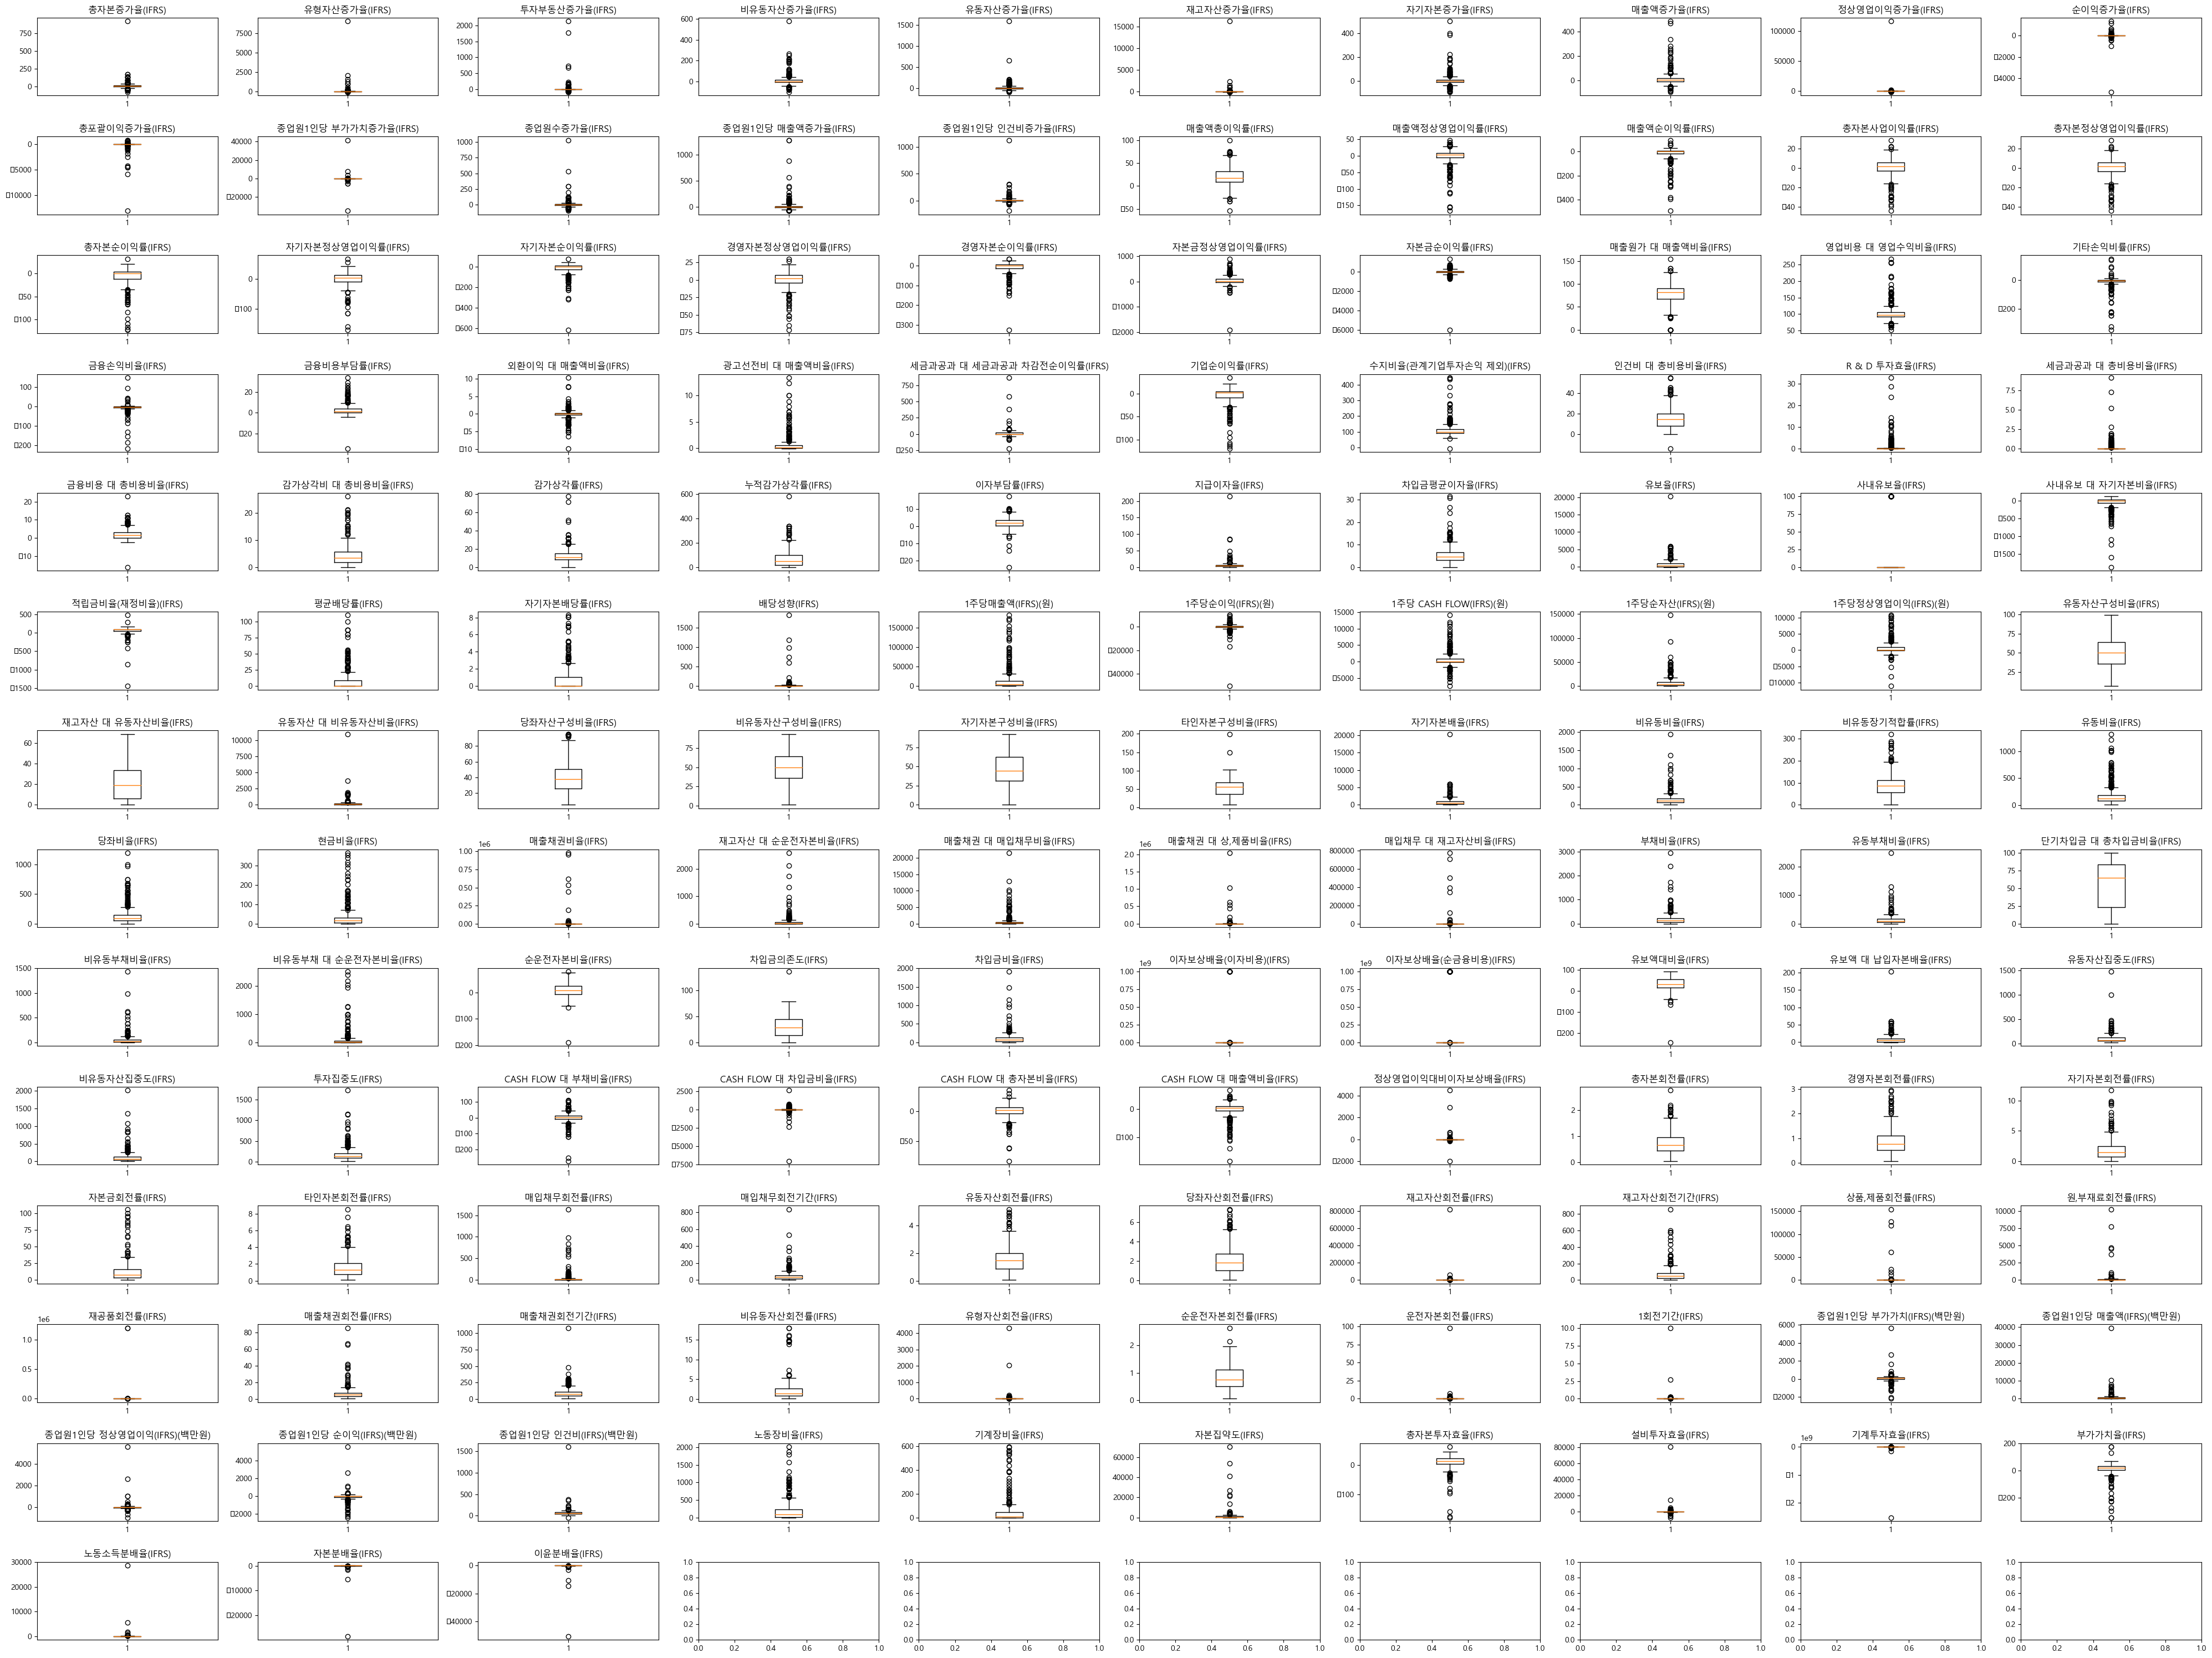

In [16]:
selected_variables = X_train
# 5x4 subplot 생성
fig, axes = plt.subplots(14, 10, figsize=(40, 30))
axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

for i, var in enumerate(selected_variables):
    # i번째 axes에 i번째 변수의 히스토그램을 그림
    axes[i].boxplot(df[var])
    axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

plt.tight_layout()  # subplot 간격 조정
plt.show()

## 3. 스케일링

## 4. Feature Selection

In [17]:
a_list = 10**np.linspace(-1,5,7)
ratio = np.linspace(0,1,20)
mean_squred_err = lambda y, yhat:np((y-yhat)**2)

In [18]:
X_train = X_train.fillna(0)

In [19]:
lasso = LassoCV(alphas=a_list)
lasso.fit(X_train, y_train)

print("The best alpha value is ", lasso.alpha_)
print("Features selected:", lasso.coef_.nonzero()[0])
print("The R^2 is ", lasso.score(X_train, y_train))
print("The MSE of the best model is", mean_squared_error(y_train, lasso.predict(X_train)))

The best alpha value is  100000.0
Features selected: [85 86]
The R^2 is  0.013201351940516193
The MSE of the best model is 0.17946280019518213


In [20]:
list_1 = list(lasso.coef_.nonzero()[0])
for i in list_1:
    print(X_train.columns[int(i)])

이자보상배율(이자비용)(IFRS)
이자보상배율(순금융비용)(IFRS)


In [21]:
def feature_selection_ttest(X, y, alpha=0.05):
    selected_features = []
    p_values = {}
    
    for column in X.columns:
        t_stat, p_value = ttest_ind(X.loc[y == 0, column], X.loc[y == 1, column])
        
        if p_value < alpha:
            selected_features.append(column)
            p_values[column] = p_value
    
    return selected_features, p_values

# t-test를 사용하여 피처 선택
selected_features, p_values = feature_selection_ttest(X_train, y_train)

print("Selected features:", selected_features)
print("P-values for selected features:", p_values)

Selected features: ['유형자산증가율(IFRS)', '매출액총이익률(IFRS)', '매출원가 대 매출액비율(IFRS)', '광고선전비 대 매출액비율(IFRS)', '인건비 대 총비용비율(IFRS)', '자기자본구성비율(IFRS)', '타인자본구성비율(IFRS)', '유동비율(IFRS)', '당좌비율(IFRS)', '현금비율(IFRS)', '부채비율(IFRS)', '유동부채비율(IFRS)', '순운전자본비율(IFRS)', '유보액대비율(IFRS)', '유동자산집중도(IFRS)', '투자집중도(IFRS)', '총자본회전률(IFRS)', '경영자본회전률(IFRS)', '자기자본회전률(IFRS)', '자본금회전률(IFRS)', '유동자산회전률(IFRS)', '당좌자산회전률(IFRS)', '재고자산회전기간(IFRS)', '매출채권회전률(IFRS)', '매출채권회전기간(IFRS)', '순운전자본회전률(IFRS)', '1회전기간(IFRS)']
P-values for selected features: {'유형자산증가율(IFRS)': 0.027452204083464406, '매출액총이익률(IFRS)': 0.0072621246991853424, '매출원가 대 매출액비율(IFRS)': 0.0015766661400489503, '광고선전비 대 매출액비율(IFRS)': 0.018976470672564465, '인건비 대 총비용비율(IFRS)': 2.4882383656278533e-06, '자기자본구성비율(IFRS)': 0.0023556231584903908, '타인자본구성비율(IFRS)': 0.0018874805851133397, '유동비율(IFRS)': 0.0005483311442349049, '당좌비율(IFRS)': 0.003732754763576035, '현금비율(IFRS)': 0.02072913872866691, '부채비율(IFRS)': 0.028193461706840284, '유동부채비율(IFRS)': 0.014892852931098427, '순운전자본비율(I

In [22]:
len(selected_features)

27

In [23]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [24]:
# VIF를 계산합니다.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                feature         VIF
0         유형자산증가율(IFRS)    1.181799
1         매출액총이익률(IFRS)    8.206809
2    매출원가 대 매출액비율(IFRS)   52.211841
3   광고선전비 대 매출액비율(IFRS)    2.116016
4     인건비 대 총비용비율(IFRS)    7.583556
5        자기자본구성비율(IFRS)   64.069188
6        타인자본구성비율(IFRS)   62.921844
7            유동비율(IFRS)   91.968608
8            당좌비율(IFRS)   93.429748
9            현금비율(IFRS)    5.807404
10           부채비율(IFRS)   39.186942
11         유동부채비율(IFRS)   34.240248
12        순운전자본비율(IFRS)   11.555742
13         유보액대비율(IFRS)   10.321097
14        유동자산집중도(IFRS)   13.062667
15          투자집중도(IFRS)   12.617073
16         총자본회전률(IFRS)  144.155805
17        경영자본회전률(IFRS)   65.820951
18        자기자본회전률(IFRS)   18.287444
19         자본금회전률(IFRS)    2.535894
20        유동자산회전률(IFRS)   75.403477
21        당좌자산회전률(IFRS)   29.992520
22       재고자산회전기간(IFRS)    7.403931
23        매출채권회전률(IFRS)    5.673091
24       매출채권회전기간(IFRS)    9.528076
25       순운전자본회전률(IFRS)   79.316686
26          1회전기간(IFRS)    2

VIF 데이터:
                feature         VIF
0         유형자산증가율(IFRS)    1.181799
1         매출액총이익률(IFRS)    8.206809
2    매출원가 대 매출액비율(IFRS)   52.211841
3   광고선전비 대 매출액비율(IFRS)    2.116016
4     인건비 대 총비용비율(IFRS)    7.583556
5        자기자본구성비율(IFRS)   64.069188
6        타인자본구성비율(IFRS)   62.921844
7            유동비율(IFRS)   91.968608
8            당좌비율(IFRS)   93.429748
9            현금비율(IFRS)    5.807404
10           부채비율(IFRS)   39.186942
11         유동부채비율(IFRS)   34.240248
12        순운전자본비율(IFRS)   11.555742
13         유보액대비율(IFRS)   10.321097
14        유동자산집중도(IFRS)   13.062667
15          투자집중도(IFRS)   12.617073
16         총자본회전률(IFRS)  144.155805
17        경영자본회전률(IFRS)   65.820951
18        자기자본회전률(IFRS)   18.287444
19         자본금회전률(IFRS)    2.535894
20        유동자산회전률(IFRS)   75.403477
21        당좌자산회전률(IFRS)   29.992520
22       재고자산회전기간(IFRS)    7.403931
23        매출채권회전률(IFRS)    5.673091
24       매출채권회전기간(IFRS)    9.528076
25       순운전자본회전률(IFRS)   79.316686
26          1회전기간(I

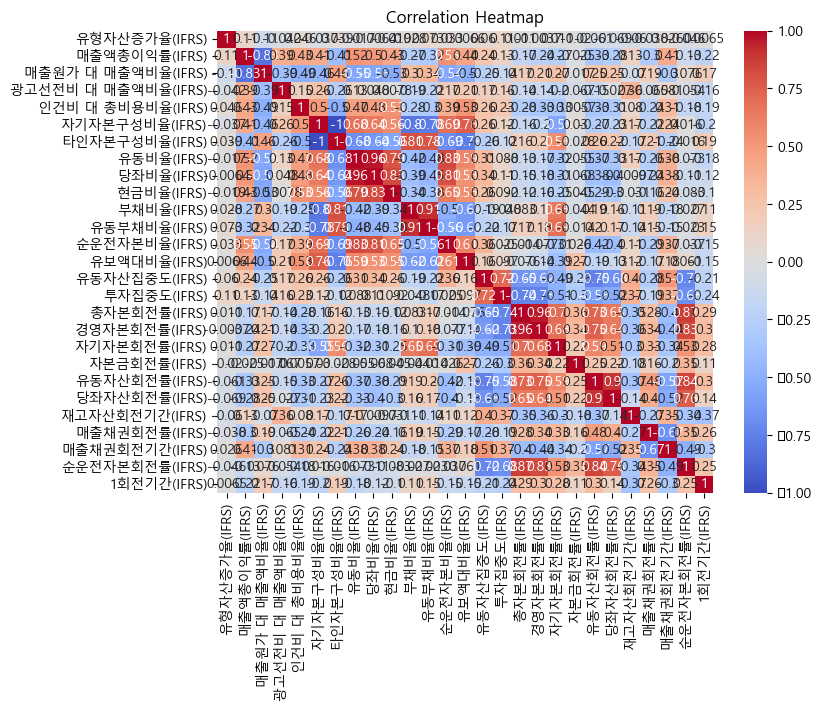

In [25]:
# VIF를 계산합니다.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("VIF 데이터:")
print(vif_data)

# 상관행렬을 계산합니다.
corr_matrix = X_train.corr()

# 히트맵을 그립니다.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 5. resampling

In [26]:
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k, v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' %(k,v,v /len(y) *100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=1, n=207 (50.000%)
Class=0, n=207 (50.000%)


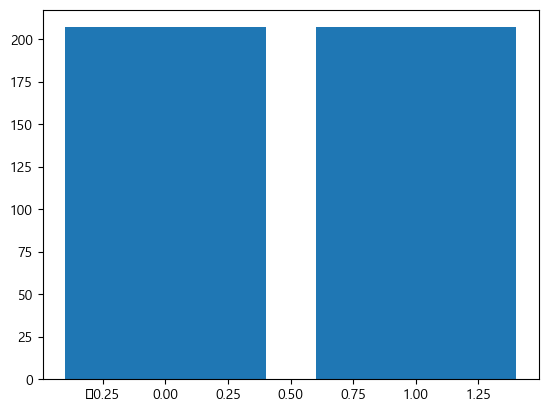

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_resampled_t, y_train_resampled_t = smoteto.fit_resample(X_train, y_train)
count_and_plot(y_train_resampled_t)

## 6. 모델링

### 6.1 로지스틱 회귀 분석

In [28]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # 로지스틱 회귀 모델 생성과 학습
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # 테스트 데이터에 대한 예측
# y_pred = model.predict(X_test)

# # 다양한 평가 지표 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


In [29]:
# from sklearn.model_selection import GridSearchCV

# # 로지스틱 회귀 모델 생성
# logistic = LogisticRegression()

# # 하이퍼파라미터 그리드 정의
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# # 그리드 서치 객체 생성
# grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy')

# # 그리드 서치로 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best Parameter:", grid_search.best_params_)

# # 최적의 모델을 테스트 데이터에 적용
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # 다양한 평가 지표 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


Accuracy: 0.717948717948718
Precision: 0.7857142857142857
Recall: 0.8651685393258427
F1 Score: 0.8235294117647058
Confusion_matrix:  
 [[ 7 21]
 [12 77]]


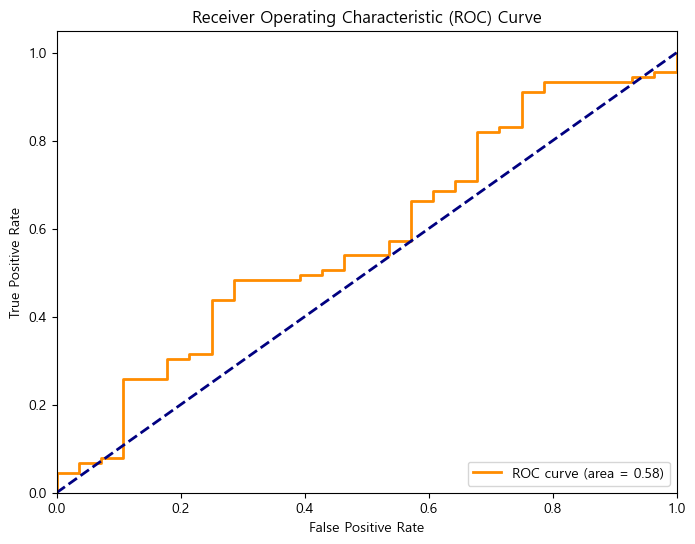

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# 예시 데이터 (X_train, X_test, y_train, y_test가 있다고 가정)
# model 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가 지표 계산
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

# ROC 커브 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 6-2.catboost

In [35]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')

# 모델 학습
model.fit(X_train, y_train, verbose=0)

# 테스트 데이터에 대한 예측
y_pred2 = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.717948717948718
Precision: 0.7857142857142857
Recall: 0.8651685393258427
F1 Score: 0.8235294117647058
Confusion_matrix:  
 [[ 7 21]
 [12 77]]


### 6-3.Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree 모델 생성
model = DecisionTreeClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.717948717948718
Precision: 0.8181818181818182
Recall: 0.8089887640449438
F1 Score: 0.8135593220338984
Confusion_matrix:  
 [[12 16]
 [17 72]]


### 6-4.나이브베이즈

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 기본 나이브 베이즈 분류기 생성
base_model = GaussianNB()

# 배깅 분류기 생성
model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.5128205128205128
Precision: 0.7857142857142857
Recall: 0.4943820224719101
F1 Score: 0.6068965517241379
Confusion_matrix:  
 [[16 12]
 [45 44]]


In [73]:
# X_test = X_test.fillna(0)

In [39]:
df2 = pd.DataFrame()

In [40]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_train = logit.predict(X_train)
y_pred_test = logit.predict(X_test)

log_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
log_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['logit_train'] = log_train
df2['logit_test'] = log_test

print(confusion_matrix(y_test,y_pred_test))

[[ 7 21]
 [12 77]]


In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

rf_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
rf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['rf_train'] = rf_train
df2['rf_test'] = rf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 7 21]
 [ 5 84]]


In [42]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

xgb_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
xgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['xgb_train'] = xgb_train
df2['xgb_test'] = xgb_test


print(confusion_matrix(y_test,y_pred_test))

[[ 9 19]
 [ 6 83]]


In [43]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

lgb_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
lgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['lgb_train'] = lgb_train
df2['lgb_test'] = lgb_test


print(confusion_matrix(y_test,y_pred_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 207, number of negative: 65
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.761029 -> initscore=1.158332
[LightGBM] [Info] Start training from score 1.158332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [44]:
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train, y_train)
y_pred_train = cat.predict(X_train)
y_pred_test = cat.predict(X_test)

cat_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
cat_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['cat_train'] = cat_train
df2['cat_test'] = cat_test


print(confusion_matrix(y_test,y_pred_test))

[[ 6 22]
 [ 5 84]]


In [45]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred_train = svc_clf.predict(X_train)
y_pred_test = svc_clf.predict(X_test)

svc_clf_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
svc_clf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['svm_train'] = svc_clf_train
df2['svm_test'] = svc_clf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 0 28]
 [ 2 87]]


In [87]:
# clf = TabNetClassifier()

# # 모델 훈련
# clf.fit(
#     X_train.values, y_train.values,
#     eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
#     eval_name=['train', 'test'],
#     eval_metric=['accuracy'],
#     max_epochs=10,
#     patience=10,
#     batch_size=1024, 
#     virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False
# )

ImportError: cannot import name 'maybe_upload_prof_stats_to_manifold' from 'torch._utils_internal' (c:\Users\skfns\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\_utils_internal.py)

In [91]:
# y_pred_train = clf.predict(X_train.values)
# y_pred_test = clf.predict(X_test.values)

# tab_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
# tab_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

# df['tabnet_train'] = tab_train
# df['tabnet_test'] = tab_test


# print(confusion_matrix(y_test,y_pred_test))

ValueError: Length of values (5) does not match length of index (389)

In [89]:
# import torch
# import pytorch_tabnet

# print("PyTorch Version:", torch.__version__)
# print("pytorch_tabnet Version:", pytorch_tabnet.__version__)


PyTorch Version: 2.3.0+cpu


AttributeError: module 'pytorch_tabnet' has no attribute '__version__'

In [46]:
df2.index = ['accuracy','precision','recall','f1-score','roc-auc']
df2

,logit_train,logit_test,rf_train,rf_test,xgb_train,xgb_test,lgb_train,lgb_test,cat_train,cat_test,svm_train,svm_test
accuracy,0.794118,0.717949,1.0,0.777778,1.0,0.786325,1.0,0.777778,0.996324,0.769231,0.772059,0.743590
precision,0.824034,0.785714,1.0,0.800000,1.0,0.813725,1.0,0.805825,0.995192,0.792453,0.769517,0.756522
recall,0.927536,0.865169,1.0,0.943820,1.0,0.932584,1.0,0.932584,1.000000,0.943820,1.000000,0.977528
f1-score,0.872727,0.823529,1.0,0.865979,1.0,0.869110,1.0,0.864583,0.997590,0.861538,0.869748,0.852941
roc-auc,0.648384,0.557584,1.0,0.596910,1.0,0.627006,1.0,0.609149,0.992308,0.579053,0.523077,0.488764
